# TFL - AccidentStats

In [15]:
! pip install requests pandas matplotlib python-dotenv

In [16]:
import requests
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from dotenv import load_dotenv

* _load variables_

In [2]:
load_dotenv()

True

In [3]:
APP_ID = os.getenv('APP_ID')
API_KEY = os.getenv('API_KEY')
YEAR = 2019

* ## _accidents_

In [6]:
url = f'https://api.tfl.gov.uk/AccidentStats/{YEAR}?app_id={APP_ID}&app_key={API_KEY}'

In [7]:
response = requests.get(url)

if response.status_code == 200:
    accident_data = response.json()
    print(accident_data[:2])
else:
    print(f'Error: {response.status_code}, {response.text}')


[{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities', 'id': 345906, 'lat': 51.511963, 'lon': -0.028211, 'location': 'On Commercial Road Near The Junction With Burdett Road', 'date': '2019-01-03T01:20:00Z', 'severity': 'Slight', 'borough': 'Tower Hamlets', 'casualties': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities', 'age': 27, 'class': 'Driver', 'severity': 'Slight', 'mode': 'Car', 'ageBand': 'Adult'}], 'vehicles': [{'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities', 'type': 'Car'}, {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities', 'type': 'Car'}]}, {'$type': 'Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities', 'id': 345907, 'lat': 51.371636, 'lon': -0.117621, 'location': 'On Purley Way 20 metres north of The Junction With Waddon Road', 'date': '2019-01-02T22:

In [8]:

my_list = []

for accident in accident_data:
    date = accident['date']
    borough = accident['borough']
    lat = accident['lat']
    lon = accident['lon']
    severity = accident['severity']
    total_vehicles = len(accident['vehicles'])
    vehicles = [vehicle['type'] for (vehicle) in accident['vehicles']]

    my_list.append({
        'Date': date,
        'Borough': borough,
        'Severity': severity,
        'Vehicles Total': total_vehicles,
        'Vehicles Types': vehicles,
        'Latitude': lat,
        'Longitude': lon
    })

    #print(f'Date: {date}\n Borough: {borough}\n Severity: {severity}\n Vehicles Total: {total_vehicles} \n Vehicle Types: {vehicles}\n\n')


In [9]:
my_list[:2]

[{'Date': '2019-01-03T01:20:00Z',
  'Borough': 'Tower Hamlets',
  'Severity': 'Slight',
  'Vehicles Total': 2,
  'Vehicles Types': ['Car', 'Car'],
  'Latitude': 51.511963,
  'Longitude': -0.028211},
 {'Date': '2019-01-02T22:45:00Z',
  'Borough': 'Croydon',
  'Severity': 'Slight',
  'Vehicles Total': 2,
  'Vehicles Types': ['Car', 'Car'],
  'Latitude': 51.371636,
  'Longitude': -0.117621}]

In [10]:
tfl_accident_df = pd.DataFrame(my_list)
tfl_accident_df.reset_index()
tfl_accident_df.head()

,Date,Borough,Severity,Vehicles Total,Vehicles Types,Latitude,Longitude
0,2019-01-03T01:20:00Z,Tower Hamlets,Slight,2,"[Car, Car]",51.511963,-0.028211
1,2019-01-02T22:45:00Z,Croydon,Slight,2,"[Car, Car]",51.371636,-0.117621
2,2019-01-02T18:45:00Z,Tower Hamlets,Slight,2,"[PedalCycle, Motorcycle_50_125cc]",51.514951,-0.072747
3,2019-01-03T08:41:00Z,Ealing,Slight,1,[Car],51.519173,-0.262356
4,2019-01-03T08:37:00Z,Islington,Slight,2,"[Motorcycle_50_125cc, Car]",51.565743,-0.136308


In [11]:
len(tfl_accident_df['Borough'].unique())

33

### 1. _count per borough_

In [12]:
borough_counts = tfl_accident_df['Borough'].value_counts().sort_values(ascending=False).rename('Total Accidents').reset_index()

borough_counts

,Borough,Total Accidents
0,City of Westminster,3032
1,Lambeth,2382
2,Tower Hamlets,2232
3,Southwark,2186
4,Ealing,1966
5,Croydon,1908
6,Barnet,1896
7,Enfield,1894
8,Wandsworth,1890
9,Camden,1838


### 2. _severity per borough_

In [13]:
borough_severity_group = tfl_accident_df.groupby(['Borough', 'Severity']).size().unstack(fill_value=0).reset_index()

borough_severity_group.head()

Severity,Borough,Fatal,Serious,Slight
0,Barking and Dagenham,8,160,1044
1,Barnet,8,270,1618
2,Bexley,6,136,808
3,Brent,12,220,1490
4,Bromley,12,190,1216


* _merge 1 & 2 on Borough_

In [14]:
accidents_sorted_df = pd.merge(borough_severity_group, borough_counts, on='Borough', how='inner')


accidents_sorted_df.head()

,Borough,Fatal,Serious,Slight,Total Accidents
0,Barking and Dagenham,8,160,1044,1212
1,Barnet,8,270,1618,1896
2,Bexley,6,136,808,950
3,Brent,12,220,1490,1722
4,Bromley,12,190,1216,1418


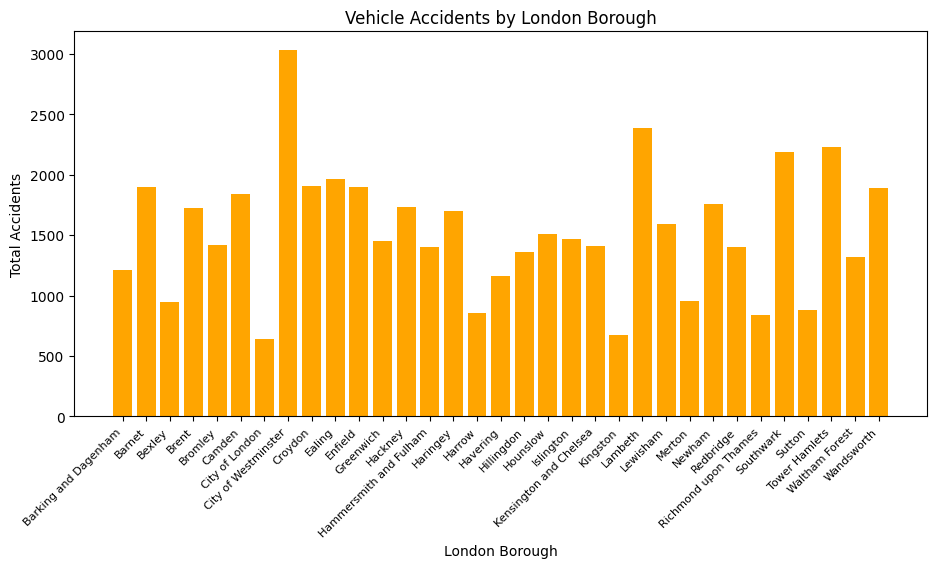

In [27]:
plt.figure(figsize=(11,5))
plt.bar(accidents_sorted_df["Borough"], accidents_sorted_df["Total Accidents"], color='orange')
plt.xlabel("London Borough")
plt.ylabel("Total Accidents")
plt.title("Vehicle Accidents by London Borough")
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.show()

* _plot serious and fatal accidents_
    * _dual line_

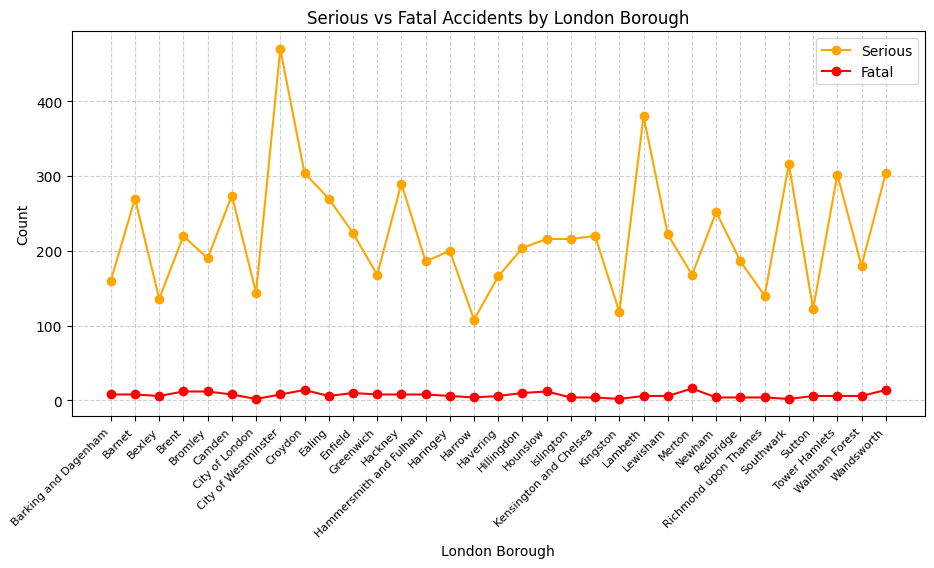

In [ ]:
plt.figure(figsize=(11, 5))

plt.plot(borough_severity_group['Borough'],borough_severity_group['Serious'], marker='o', linestyle='-', color='orange', label='Serious'
         )
plt.plot(borough_severity_group['Borough'],borough_severity_group['Fatal'], marker='o', linestyle='-', color='red', label='Fatal')

plt.title('Serious vs Fatal Accidents by London Borough')

plt.xlabel('London Borough')
plt.ylabel('Count')

plt.xticks(rotation=45, fontsize=8, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

## _accessibility_

* _step free interchanges_

In [29]:
df = pd.read_csv('data/StepFreeIntechangeInfo.csv')

df.head()

,FromPlatformUniqueId,ToPlatformUniqueId,DistanceInMetres
0,910GACTNCTL-Plat01-WB-london-overground,910GACTNCTL-Plat02-EB-london-overground,50
1,910GACTNCTL-Plat02-EB-london-overground,910GACTNCTL-Plat01-WB-london-overground,50
2,910GANERLEY-Plat01-NB-london-overground,910GANERLEY-Plat02-SB-london-overground,220
3,910GANERLEY-Plat02-SB-london-overground,910GANERLEY-Plat01-NB-london-overground,220
4,910GBHILLPK-Plat01-SB-london-overground,910GBHILLPK-Plat02-NB-london-overground,290


* _station lifts_

In [30]:
df_2 = pd.read_csv('data/Lifts.csv')

In [ ]:
lifts_cleaned = df_2.drop(columns=['NationalRailUprn', 'LiftName', 'IntermediateAreas', 'IntermediateAreas2'], axis=1)

lifts_cleaned.head()

,StationUniqueId,LiftUniqueId,LiftId,FriendlyName,FromAreas,ToAreas,LimitedCapacityLift,LiftNotes
0,910GACTONML,910GACTONML-Lift-1,1,Lift A,910GACTONML-1001003-AC-S-6,910GACTONML-1001003-RPL1-2,False,NaN
1,910GACTONML,910GACTONML-Lift-2,2,Lift B,910GACTONML-1001003-AC-S-6,910GACTONML-1001003-RPL2-5,False,NaN
2,910GBRENTX,910GBRENTX-Lift-1,1,Lift 1,910GBRENTX-1002310-EntW-7,910GBRENTX-1002310-FB-8,False,NaN
3,910GBRENTX,910GBRENTX-Lift-2,2,Lift 2,910GBRENTX-1002310-RLY-5,910GBRENTX-1002310-RPL4-10|910GBRENTX-1002310-...,False,NaN
4,910GBRENTX,910GBRENTX-Lift-3,3,Lift 3,910GBRENTX-1002310-RLY-5,910GBRENTX-1002310-RPL2-3|910GBRENTX-1002310-R...,False,NaN


* _stations for StationUniqueId_

In [32]:
df_3 = pd.read_csv('data/Stations.csv')

df_3.head()

,UniqueId,Name,FareZones,HubNaptanCode,Wifi,OutsideStationUniqueId,BlueBadgeCarParking,BlueBadgeCarParkSpaces,TaxiRanksOutsideStation,MainBusInterchange,PierInterchange,NationalRailInterchange,AirportInterchange,EmiratesAirLineInterchange
0,HUBABW,Abbey Wood,4,HUBABW,False,HUBABW-Outside,False,NaN,False,NaN,NaN,NaN,NaN,NaN
1,910GACTNCTL,Acton Central,3,NaN,True,910GACTNCTL-Outside,False,NaN,False,NaN,NaN,NaN,NaN,NaN
2,910GACTONML,Acton Main Line,3,NaN,False,910GACTONML-Outside,False,NaN,False,NaN,NaN,NaN,NaN,NaN
3,910GANERLEY,Anerley,4,NaN,True,910GANERLEY-Outside,False,NaN,False,NaN,NaN,NaN,NaN,NaN
4,910GBCKNHMH,Beckenham Hill,4,NaN,False,910GBCKNHMH-Outside,False,NaN,False,NaN,NaN,NaN,NaN,NaN


In [36]:
stations_info = df_3.drop(columns=['HubNaptanCode', 'OutsideStationUniqueId', 'BlueBadgeCarParkSpaces', 'TaxiRanksOutsideStation', 'MainBusInterchange', 'PierInterchange', 'NationalRailInterchange', 'AirportInterchange', 'EmiratesAirLineInterchange'], axis=1)

stations_info.rename(columns={"UniqueId": "StationUniqueId"}, inplace=True)

stations_info.head()

,StationUniqueId,Name,FareZones,Wifi,BlueBadgeCarParking
0,HUBABW,Abbey Wood,4,False,False
1,910GACTNCTL,Acton Central,3,True,False
2,910GACTONML,Acton Main Line,3,False,False
3,910GANERLEY,Anerley,4,True,False
4,910GBCKNHMH,Beckenham Hill,4,False,False


* _staionsinfo merge with liftscleaned_

In [38]:
stations_with_lifts = stations_info.merge(lifts_cleaned, on='StationUniqueId', how='left').drop_duplicates()

stations_with_lifts.head()

,StationUniqueId,Name,FareZones,Wifi,BlueBadgeCarParking,LiftUniqueId,LiftId,FriendlyName,FromAreas,ToAreas,LimitedCapacityLift,LiftNotes
0,HUBABW,Abbey Wood,4,False,False,HUBABW-Lift-1,1,Lift A,HUBABW-1001001-FELIX-6,HUBABW-1001001-HARRO-2,False,NaN
1,HUBABW,Abbey Wood,4,False,False,HUBABW-Lift-2,2,Lift B,HUBABW-1001001-FELIX-6,NaN,False,NaN
2,HUBABW,Abbey Wood,4,False,False,HUBABW-Lift-3,3,Lift C,HUBABW-1001001-WILTO-1,HUBABW-1001001-HARRO-2,False,NaN
3,HUBABW,Abbey Wood,4,False,False,HUBABW-Lift-4,4,Lift D,HUBABW-1001001-WILTO-1,NaN,False,NaN
4,HUBABW,Abbey Wood,4,False,False,HUBABW-Lift-6,6,Lift F,HUBABW-1001001-TH-11,HUBABW-1001001-RPLD-3|HUBABW-1001001-RPLC-7,False,NaN
